In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as py
from keras.models import load_model

Using TensorFlow backend.


In [3]:
modelx = load_model('/ds/model/stock/jd01.h5')

In [7]:
import pandas as pd

In [8]:
def get_local_data(codex):

    ffile = '/ds/datas/stock/%s'%codex
    da = pd.read_pickle(ffile)
    return da

In [9]:
xcode = 'DD'
tdata = get_local_data(xcode)

In [11]:
nday = 1 
fsdata = tdata.values[:-nday]
#fsdata = tdata.values
#guiyi
print(fsdata[:, 1]) 
for i in range(fsdata.shape[1]):
    ksum = np.sqrt(sum(pow(fsdata[:,i],2)))
    print(" %d %d"%(i, ksum))
    fsdata[:,i] /= (ksum*1.0)
xtrain = int((tdata.values.shape[0] / 10) * 7)
xtest = int((tdata.values.shape[0] / 10) * 2)

print(fsdata.shape)
print(xtrain)
print(xtest)

xdata = {}
xdata['train'] = fsdata[:xtrain]
xdata['test'] = fsdata[xtrain:xtrain + xtest]
xdata['val'] = fsdata[xtrain+xtest:]
    
ydata = {}
fclose = [w for w in tdata.Close]
fclose = np.array(fclose)

fclose = fclose[nday:]
print(fsdata.shape)
print(fclose.shape)
ydata['train'] = fclose[:xtrain]
ydata['test'] = fclose[xtrain:xtrain+xtest]
ydata['val'] = fclose[xtrain + xtest:]

print(xdata['train'].shape)
xdata['train'] = xdata['train'].reshape(xdata['train'].shape[0],1,xdata['train'].shape[1])
xdata['test'] = xdata['test'].reshape(xdata['test'].shape[0],1,xdata['test'].shape[1])
xdata['val'] = xdata['val'].reshape(xdata['val'].shape[0],1,xdata['val'].shape[1])
ydata['train'] = ydata['train'].reshape(ydata['train'].shape[0],1)
ydata['test'] = ydata['test'].reshape(ydata['test'].shape[0],1)
ydata['val'] = ydata['val'].reshape(ydata['val'].shape[0],1)

xdata['train'] = xdata['train'].astype(np.float32)
xdata['test'] = xdata['test'].astype(np.float32)
xdata['val'] = xdata['val'].astype(np.float32)
ydata['train'] = ydata['train'].astype(np.float32)
ydata['test'] = ydata['test'].astype(np.float32)
ydata['val'] = ydata['val'].astype(np.float32)

pp = modelx.predict(xdata['test'])    

[ 46.92  47.08  47.   ...,  79.19  79.35  80.4 ]
 0 2299
 1 2318
 2 2281
 3 2300
 4 203897353
 5 3
 6 36
 7 2108
 8 2125
 9 2091
 10 2109
 11 203897353
(1350, 12)
945
270
(1350, 12)
(1350,)
(945, 12)


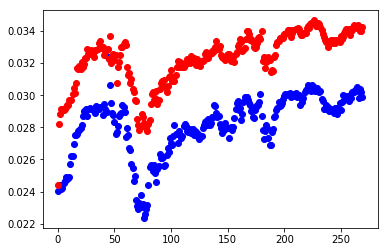

In [20]:
pp = modelx.predict(xdata['test'])  
pylab.plot(ydata['test'],'bo')
pylab.plot(pp,'ro')

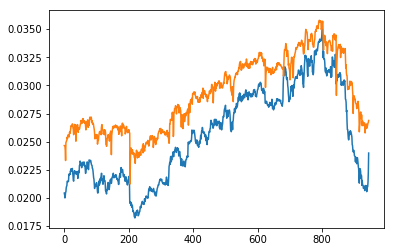

In [17]:
pp = modelx.predict(xdata['train'])    
pylab.plot(ydata['train'])
pylab.plot(pp)

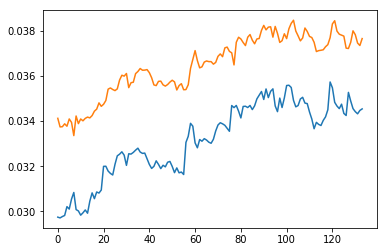

In [33]:
pp = modelx.predict(xdata['val'][:-1]) 
pylab.plot(ydata['val'][:-1])
#print(ydata['val'][:-1])
pylab.plot(pp)